In [55]:
# read dataset
import pandas as pd
df = pd.read_csv("ocd_patient_dataset.csv")
df.head()

,Patient ID,Age,Gender,Ethnicity,Marital Status,Education Level,OCD Diagnosis Date,Duration of Symptoms (months),Previous Diagnoses,Family History of OCD,Obsession Type,Compulsion Type,Y-BOCS Score (Obsessions),Y-BOCS Score (Compulsions),Depression Diagnosis,Anxiety Diagnosis,Medications
0,1018,32,Female,African,Single,Some College,2016-07-15,203,MDD,No,Harm-related,Checking,17,10,Yes,Yes,SNRI
1,2406,69,Male,African,Divorced,Some College,2017-04-28,180,NaN,Yes,Harm-related,Washing,21,25,Yes,Yes,SSRI
2,1188,57,Male,Hispanic,Divorced,College Degree,2018-02-02,173,MDD,No,Contamination,Checking,3,4,No,No,Benzodiazepine
3,6200,27,Female,Hispanic,Married,College Degree,2014-08-25,126,PTSD,Yes,Symmetry,Washing,14,28,Yes,Yes,SSRI
4,5824,56,Female,Hispanic,Married,High School,2022-02-20,168,PTSD,Yes,Hoarding,Ordering,39,18,No,No,NaN


In [56]:
# convert to boolean
df = pd.read_csv("ocd_patient_dataset.csv", true_values =["Yes"], false_values=["No"])
df

,Patient ID,Age,Gender,Ethnicity,Marital Status,Education Level,OCD Diagnosis Date,Duration of Symptoms (months),Previous Diagnoses,Family History of OCD,Obsession Type,Compulsion Type,Y-BOCS Score (Obsessions),Y-BOCS Score (Compulsions),Depression Diagnosis,Anxiety Diagnosis,Medications
0,1018,32,Female,African,Single,Some College,2016-07-15,203,MDD,False,Harm-related,Checking,17,10,True,True,SNRI
1,2406,69,Male,African,Divorced,Some College,2017-04-28,180,NaN,True,Harm-related,Washing,21,25,True,True,SSRI
2,1188,57,Male,Hispanic,Divorced,College Degree,2018-02-02,173,MDD,False,Contamination,Checking,3,4,False,False,Benzodiazepine
3,6200,27,Female,Hispanic,Married,College Degree,2014-08-25,126,PTSD,True,Symmetry,Washing,14,28,True,True,SSRI
4,5824,56,Female,Hispanic,Married,High School,2022-02-20,168,PTSD,True,Hoarding,Ordering,39,18,False,False,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1495,5374,38,Male,Hispanic,Divorced,College Degree,2019-01-10,53,MDD,False,Contamination,Washing,21,33,True,True,SSRI
1496,5013,19,Female,Hispanic,Divorced,Graduate Degree,2022-09-14,160,GAD,True,Hoarding,Praying,25,16,True,True,SSRI
1497,6089,40,Male,Asian,Married,Some College,2018-03-13,100,NaN,True,Contamination,Counting,2,15,True,True,Benzodiazepine
1498,3808,37,Female,Caucasian,Married,Some College,2018-04-14,210,GAD,True,Contamination,Washing,16,7,True,False,Benzodiazepine


In [57]:
# display variable datatypes
df.dtypes

Patient ID                        int64
Age                               int64
Gender                           object
Ethnicity                        object
Marital Status                   object
Education Level                  object
OCD Diagnosis Date               object
Duration of Symptoms (months)     int64
Previous Diagnoses               object
Family History of OCD              bool
Obsession Type                   object
Compulsion Type                  object
Y-BOCS Score (Obsessions)         int64
Y-BOCS Score (Compulsions)        int64
Depression Diagnosis               bool
Anxiety Diagnosis                  bool
Medications                      object
dtype: object

In [58]:
# missing values
df.isnull().sum()

Patient ID                         0
Age                                0
Gender                             0
Ethnicity                          0
Marital Status                     0
Education Level                    0
OCD Diagnosis Date                 0
Duration of Symptoms (months)      0
Previous Diagnoses               248
Family History of OCD              0
Obsession Type                     0
Compulsion Type                    0
Y-BOCS Score (Obsessions)          0
Y-BOCS Score (Compulsions)         0
Depression Diagnosis               0
Anxiety Diagnosis                  0
Medications                      386
dtype: int64

In [59]:
# 'Previous Diagnoses' and 'Medications' do not have missing values, it just implies that the patient does not have a diagnosis or is not taking any medication respectively.
# Therefore filling that with the word None
df['Previous Diagnoses'] = df['Previous Diagnoses'].fillna('None')
df['Medications'] = df['Medications'].fillna('None')
df.isnull().sum()

Patient ID                       0
Age                              0
Gender                           0
Ethnicity                        0
Marital Status                   0
Education Level                  0
OCD Diagnosis Date               0
Duration of Symptoms (months)    0
Previous Diagnoses               0
Family History of OCD            0
Obsession Type                   0
Compulsion Type                  0
Y-BOCS Score (Obsessions)        0
Y-BOCS Score (Compulsions)       0
Depression Diagnosis             0
Anxiety Diagnosis                0
Medications                      0
dtype: int64

In [60]:
df['Total_Score'] = df['Y-BOCS Score (Obsessions)'] + df['Y-BOCS Score (Compulsions)']

# Display the updated DataFrame
df.head()

,Patient ID,Age,Gender,Ethnicity,Marital Status,Education Level,OCD Diagnosis Date,Duration of Symptoms (months),Previous Diagnoses,Family History of OCD,Obsession Type,Compulsion Type,Y-BOCS Score (Obsessions),Y-BOCS Score (Compulsions),Depression Diagnosis,Anxiety Diagnosis,Medications,Total_Score
0,1018,32,Female,African,Single,Some College,2016-07-15,203,MDD,False,Harm-related,Checking,17,10,True,True,SNRI,27
1,2406,69,Male,African,Divorced,Some College,2017-04-28,180,None,True,Harm-related,Washing,21,25,True,True,SSRI,46
2,1188,57,Male,Hispanic,Divorced,College Degree,2018-02-02,173,MDD,False,Contamination,Checking,3,4,False,False,Benzodiazepine,7
3,6200,27,Female,Hispanic,Married,College Degree,2014-08-25,126,PTSD,True,Symmetry,Washing,14,28,True,True,SSRI,42
4,5824,56,Female,Hispanic,Married,High School,2022-02-20,168,PTSD,True,Hoarding,Ordering,39,18,False,False,None,57


In [61]:
count_above_40 = (df['Total_Score'] > 40).sum()

# Display the result
print(f'Number of values above 40: {count_above_40}')

Number of values above 40: 720


In [62]:
filtered_df = df[df['Total_Score'] <= 40]
filtered_df

,Patient ID,Age,Gender,Ethnicity,Marital Status,Education Level,OCD Diagnosis Date,Duration of Symptoms (months),Previous Diagnoses,Family History of OCD,Obsession Type,Compulsion Type,Y-BOCS Score (Obsessions),Y-BOCS Score (Compulsions),Depression Diagnosis,Anxiety Diagnosis,Medications,Total_Score
0,1018,32,Female,African,Single,Some College,2016-07-15,203,MDD,False,Harm-related,Checking,17,10,True,True,SNRI,27
2,1188,57,Male,Hispanic,Divorced,College Degree,2018-02-02,173,MDD,False,Contamination,Checking,3,4,False,False,Benzodiazepine,7
5,6946,32,Female,Asian,Married,College Degree,2016-06-25,46,GAD,False,Hoarding,Ordering,26,11,True,True,SSRI,37
6,9861,38,Female,Hispanic,Single,College Degree,2017-03-13,110,MDD,False,Contamination,Praying,12,16,True,False,SNRI,28
7,8396,57,Male,Hispanic,Divorced,College Degree,2015-08-25,197,PTSD,False,Religious,Ordering,31,4,True,False,SSRI,35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1490,6708,58,Female,Caucasian,Married,College Degree,2018-04-08,208,PTSD,True,Harm-related,Checking,2,35,False,False,SNRI,37
1493,1819,58,Female,Hispanic,Divorced,Some College,2016-07-07,22,None,True,Contamination,Praying,10,1,False,True,SNRI,11
1494,5657,72,Male,Hispanic,Divorced,Graduate Degree,2017-09-20,238,MDD,True,Symmetry,Washing,14,25,False,True,SNRI,39
1497,6089,40,Male,Asian,Married,Some College,2018-03-13,100,None,True,Contamination,Counting,2,15,True,True,Benzodiazepine,17


In [63]:
count_above_20_O = (filtered_df['Y-BOCS Score (Obsessions)'] > 20).sum()

# Display the result
print(f'Number of values above 20: {count_above_20_O}')

df_filtered_1 = filtered_df[filtered_df['Y-BOCS Score (Obsessions)'] <= 20]
df_filtered_1

Number of values above 20: 180


,Patient ID,Age,Gender,Ethnicity,Marital Status,Education Level,OCD Diagnosis Date,Duration of Symptoms (months),Previous Diagnoses,Family History of OCD,Obsession Type,Compulsion Type,Y-BOCS Score (Obsessions),Y-BOCS Score (Compulsions),Depression Diagnosis,Anxiety Diagnosis,Medications,Total_Score
0,1018,32,Female,African,Single,Some College,2016-07-15,203,MDD,False,Harm-related,Checking,17,10,True,True,SNRI,27
2,1188,57,Male,Hispanic,Divorced,College Degree,2018-02-02,173,MDD,False,Contamination,Checking,3,4,False,False,Benzodiazepine,7
6,9861,38,Female,Hispanic,Single,College Degree,2017-03-13,110,MDD,False,Contamination,Praying,12,16,True,False,SNRI,28
11,7905,73,Female,Hispanic,Divorced,High School,2017-01-13,233,GAD,False,Religious,Counting,4,16,True,True,Benzodiazepine,20
16,5003,25,Male,African,Married,College Degree,2021-01-20,206,Panic Disorder,True,Religious,Counting,7,21,True,False,SSRI,28
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1490,6708,58,Female,Caucasian,Married,College Degree,2018-04-08,208,PTSD,True,Harm-related,Checking,2,35,False,False,SNRI,37
1493,1819,58,Female,Hispanic,Divorced,Some College,2016-07-07,22,None,True,Contamination,Praying,10,1,False,True,SNRI,11
1494,5657,72,Male,Hispanic,Divorced,Graduate Degree,2017-09-20,238,MDD,True,Symmetry,Washing,14,25,False,True,SNRI,39
1497,6089,40,Male,Asian,Married,Some College,2018-03-13,100,None,True,Contamination,Counting,2,15,True,True,Benzodiazepine,17


In [64]:
count_above_20_C = (df_filtered_1['Y-BOCS Score (Compulsions)'] > 20).sum()

# Display the result
print(f'Number of values above 20: {count_above_20_C}')

df_filtered_2 = df_filtered_1[df_filtered_1['Y-BOCS Score (Compulsions)'] <= 20]
df_filtered_2

Number of values above 20: 181


,Patient ID,Age,Gender,Ethnicity,Marital Status,Education Level,OCD Diagnosis Date,Duration of Symptoms (months),Previous Diagnoses,Family History of OCD,Obsession Type,Compulsion Type,Y-BOCS Score (Obsessions),Y-BOCS Score (Compulsions),Depression Diagnosis,Anxiety Diagnosis,Medications,Total_Score
0,1018,32,Female,African,Single,Some College,2016-07-15,203,MDD,False,Harm-related,Checking,17,10,True,True,SNRI,27
2,1188,57,Male,Hispanic,Divorced,College Degree,2018-02-02,173,MDD,False,Contamination,Checking,3,4,False,False,Benzodiazepine,7
6,9861,38,Female,Hispanic,Single,College Degree,2017-03-13,110,MDD,False,Contamination,Praying,12,16,True,False,SNRI,28
11,7905,73,Female,Hispanic,Divorced,High School,2017-01-13,233,GAD,False,Religious,Counting,4,16,True,True,Benzodiazepine,20
19,2637,66,Female,Asian,Divorced,College Degree,2018-08-14,73,Panic Disorder,False,Harm-related,Washing,0,12,False,True,SNRI,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1484,9561,24,Female,Asian,Married,Some College,2018-01-08,95,Panic Disorder,True,Contamination,Praying,15,9,False,True,None,24
1485,3419,62,Female,African,Single,College Degree,2020-12-11,162,Panic Disorder,False,Hoarding,Checking,20,15,False,True,SNRI,35
1493,1819,58,Female,Hispanic,Divorced,Some College,2016-07-07,22,None,True,Contamination,Praying,10,1,False,True,SNRI,11
1497,6089,40,Male,Asian,Married,Some College,2018-03-13,100,None,True,Contamination,Counting,2,15,True,True,Benzodiazepine,17


Descriptive Analytics
Corelation between duration of symptoms and total score: very weak positive linear relationship

Correlation Coefficient: 0.03


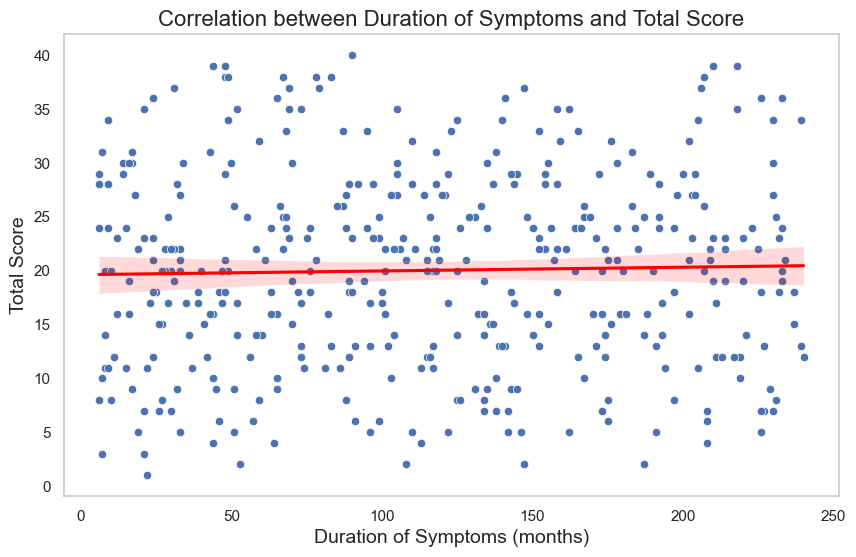

In [65]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the correlation coefficient
correlation_coefficient = df_filtered_2['Duration of Symptoms (months)'].corr(df_filtered_2['Total_Score'])

# Print the correlation coefficient
print(f'Correlation Coefficient: {correlation_coefficient:.2f}')

# Set up the matplotlib figure
plt.figure(figsize=(10, 6))

# Create a scatter plot
sns.scatterplot(x='Duration of Symptoms (months)', y='Total_Score', data=df_filtered_2)

# Add a regression line
sns.regplot(x='Duration of Symptoms (months)', y='Total_Score', data=df_filtered_2, scatter=False, color='red')

# Add titles and labels
plt.title('Correlation between Duration of Symptoms and Total Score', fontsize=16)
plt.xlabel('Duration of Symptoms (months)', fontsize=14)
plt.ylabel('Total Score', fontsize=14)
plt.grid()

# Show the plot
plt.show()

Corelation between age and total score: very weak positive linear relationship

Correlation Coefficient: 0.07


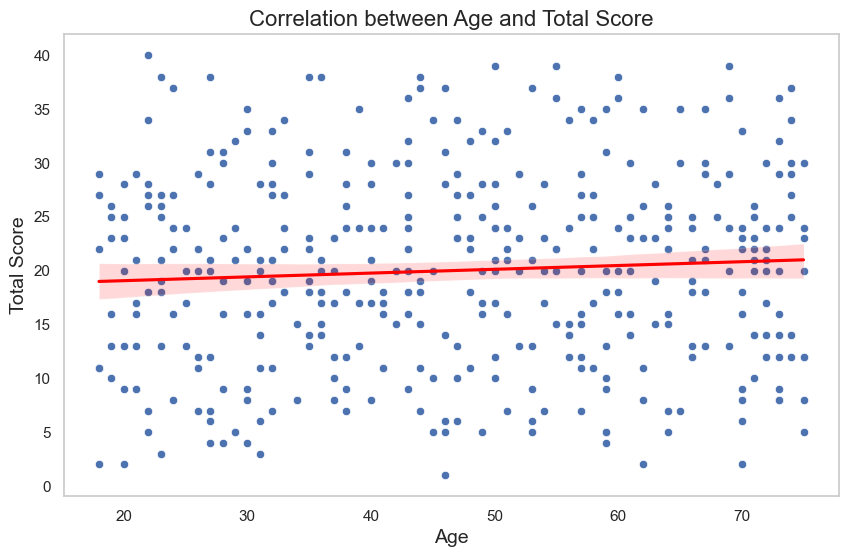

In [66]:
# Calculate the correlation coefficient
correlation_coefficient = df_filtered_2['Age'].corr(df_filtered_2['Total_Score'])

# Print the correlation coefficient
print(f'Correlation Coefficient: {correlation_coefficient:.2f}')

# Set up the matplotlib figure
plt.figure(figsize=(10, 6))

# Create a scatter plot
sns.scatterplot(x='Age', y='Total_Score', data=df_filtered_2)

# Add a regression line
sns.regplot(x='Age', y='Total_Score', data=df_filtered_2, scatter=False, color='red')

# Add titles and labels
plt.title('Correlation between Age and Total Score', fontsize=16)
plt.xlabel('Age', fontsize=14)
plt.ylabel('Total Score', fontsize=14)
plt.grid()

# Show the plot
plt.show()

Corelation between age and Y-BOCS Score (Obsessions): very weak positive linear relationship

Correlation Coefficient: 0.01


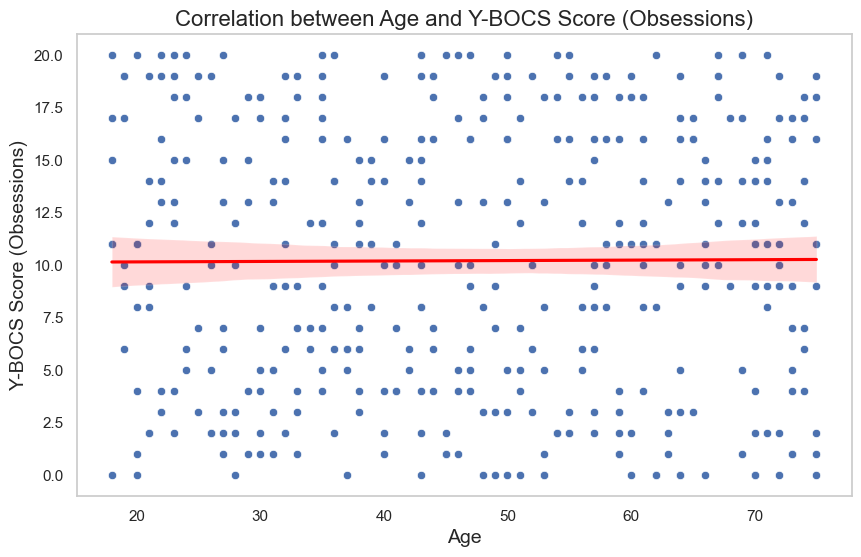

In [98]:
# Calculate the correlation coefficient
correlation_coefficient = df_filtered_2['Age'].corr(df_filtered_2['Y-BOCS Score (Obsessions)'])

# Print the correlation coefficient
print(f'Correlation Coefficient: {correlation_coefficient:.2f}')

# Set up the matplotlib figure
plt.figure(figsize=(10, 6))

# Create a scatter plot
sns.scatterplot(x='Age', y='Y-BOCS Score (Obsessions)', data=df_filtered_2)

# Add a regression line
sns.regplot(x='Age', y='Y-BOCS Score (Obsessions)', data=df_filtered_2, scatter=False, color='red')

# Add titles and labels
plt.title('Correlation between Age and Y-BOCS Score (Obsessions)', fontsize=16)
plt.xlabel('Age', fontsize=14)
plt.ylabel('Y-BOCS Score (Obsessions)', fontsize=14)
plt.grid()

# Show the plot
plt.show()

Corelation between age and Y-BOCS Score (Compulsions): weak positive linear relationship

Correlation Coefficient: 0.09


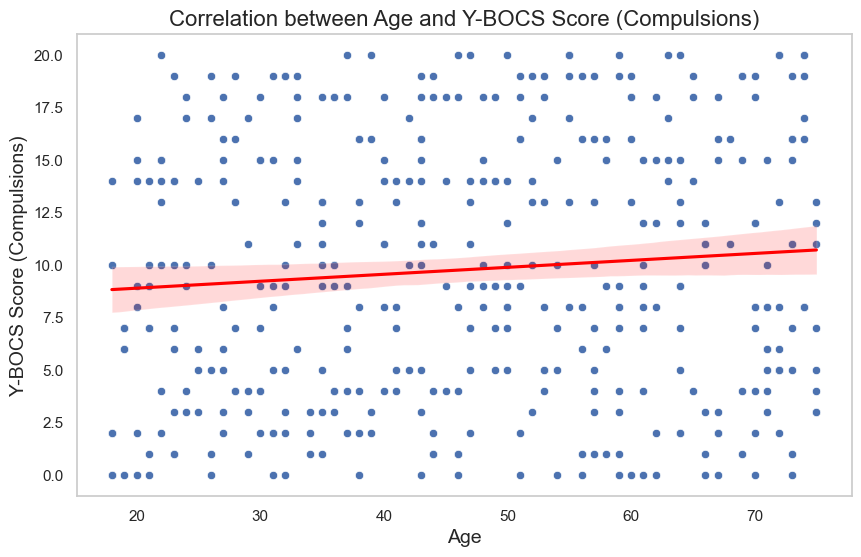

In [99]:
# Calculate the correlation coefficient
correlation_coefficient = df_filtered_2['Age'].corr(df_filtered_2['Y-BOCS Score (Compulsions)'])

# Print the correlation coefficient
print(f'Correlation Coefficient: {correlation_coefficient:.2f}')

# Set up the matplotlib figure
plt.figure(figsize=(10, 6))

# Create a scatter plot
sns.scatterplot(x='Age', y='Y-BOCS Score (Compulsions)', data=df_filtered_2)

# Add a regression line
sns.regplot(x='Age', y='Y-BOCS Score (Compulsions)', data=df_filtered_2, scatter=False, color='red')

# Add titles and labels
plt.title('Correlation between Age and Y-BOCS Score (Compulsions)', fontsize=16)
plt.xlabel('Age', fontsize=14)
plt.ylabel('Y-BOCS Score (Compulsions)', fontsize=14)
plt.grid()

# Show the plot
plt.show()

In [67]:
# Calculate average age
average_age = df_filtered_2['Age'].mean()

# Calculate gender distribution
gender_distribution = df_filtered_2['Gender'].value_counts(normalize=True) * 100  # percentages

# Calculate average total score
average_total_score = df_filtered_2['Total_Score'].mean()

# Calculate average score for Obsession
average_total_score_O = df_filtered_2['Y-BOCS Score (Obsessions)'].mean()

# Calculate average score for Compulsion
average_total_score_C = df_filtered_2['Y-BOCS Score (Compulsions)'].mean()

# Print results
print(f'Average Age: {average_age:.2f}')
print('Gender Distribution:')
print(gender_distribution)
print(f'Average Total Score: {average_total_score:.2f}')
print(f'Average Score for O: {average_total_score_O:.2f}')
print(f'Average Score for C: {average_total_score_C:.2f}')

Average Age: 47.17
Gender Distribution:
Gender
Female    53.460621
Male      46.539379
Name: proportion, dtype: float64
Average Total Score: 20.02
Average Score for O: 10.22
Average Score for C: 9.81


Distribution of Total Score in patients with and without Family History of OCD

In [68]:
family_history_count = df_filtered_2['Family History of OCD'].value_counts()

# Print the results
print('Number of Patients:')
print(family_history_count)

Number of Patients:
Family History of OCD
True     213
False    206
Name: count, dtype: int64


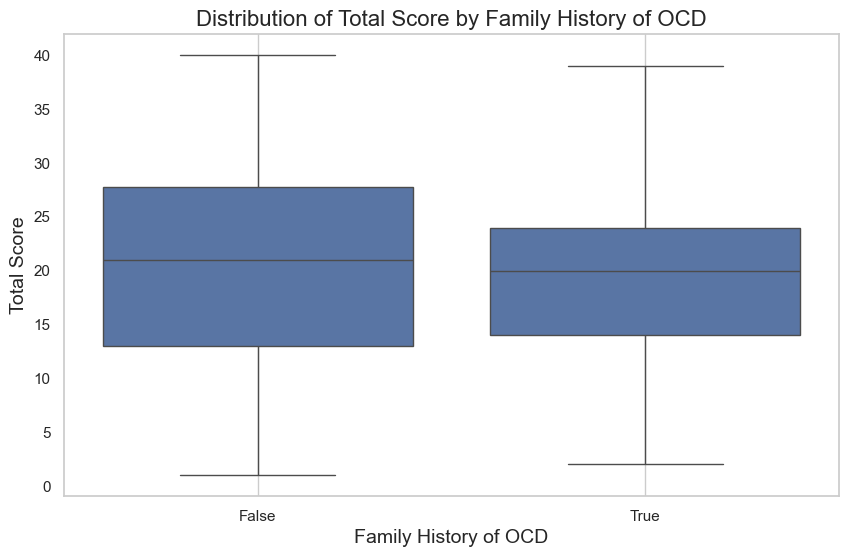

In [69]:
# Set up the matplotlib figure
plt.figure(figsize=(10, 6))

# Create a boxplot
sns.boxplot(x='Family History of OCD', y='Total_Score', data=df_filtered_2)

# Add titles and labels
plt.title('Distribution of Total Score by Family History of OCD', fontsize=16)
plt.xlabel('Family History of OCD', fontsize=14)
plt.ylabel('Total Score', fontsize=14)
plt.grid()

# Show the plot
plt.show()

Distribution of Total Score by Gender

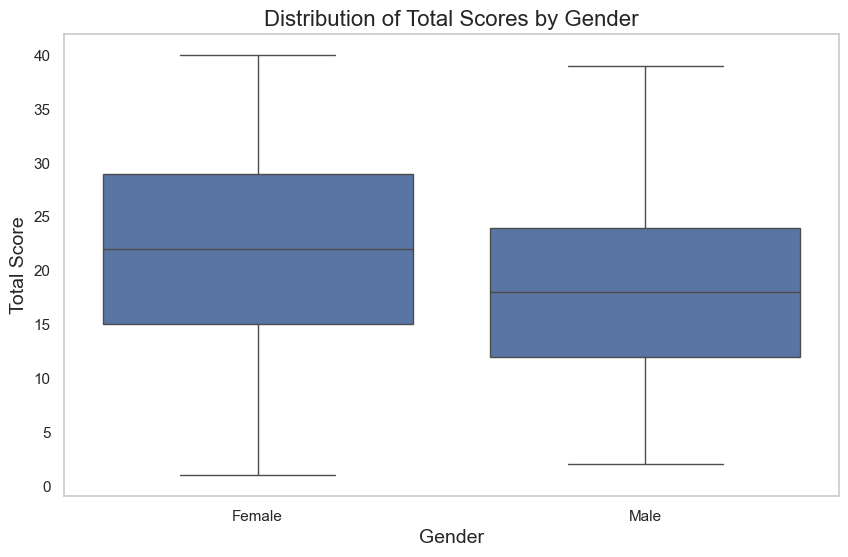

In [70]:
# Set up the matplotlib figure
plt.figure(figsize=(10, 6))

# Create a boxplot
sns.boxplot(x='Gender', y='Total_Score', data=df_filtered_2)

# Add titles and labels
plt.title('Distribution of Total Scores by Gender', fontsize=16)
plt.xlabel('Gender', fontsize=14)
plt.ylabel('Total Score', fontsize=14)
plt.grid(axis='y')

# Show the plot
plt.show()

Number of instances belonging to each Obsession type

Number of Instances for Each Obsession Type:
Obsession Type
Contamination    89
Harm-related     88
Hoarding         83
Symmetry         82
Religious        77
Name: count, dtype: int64


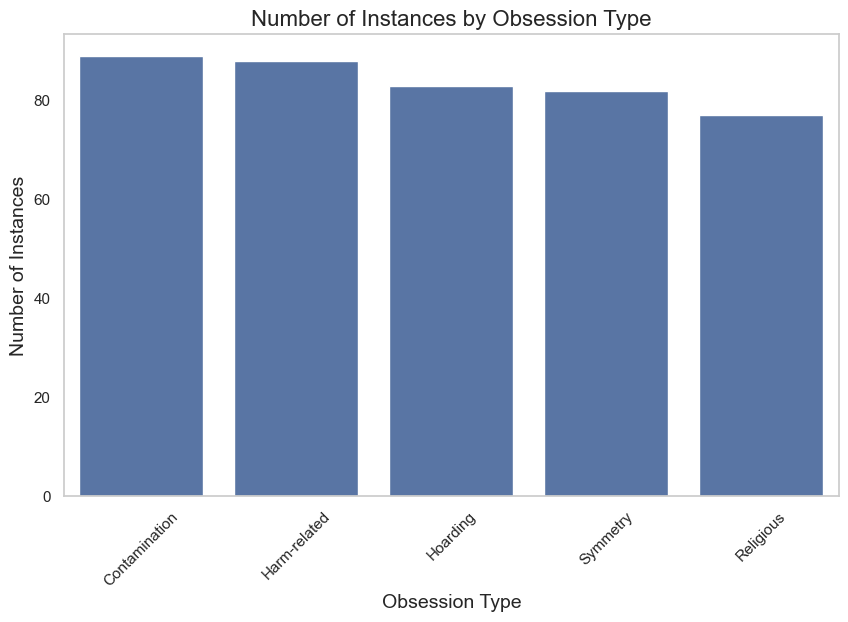

In [71]:
# Count the number of instances for each obsession type
obsession_counts = df_filtered_2['Obsession Type'].value_counts()

# Print the counts
print('Number of Instances for Each Obsession Type:')
print(obsession_counts)

# Set up the matplotlib figure
plt.figure(figsize=(10, 6))

# Create a bar plot
sns.barplot(x=obsession_counts.index, y=obsession_counts.values)

# Add titles and labels
plt.title('Number of Instances by Obsession Type', fontsize=16)
plt.xlabel('Obsession Type', fontsize=14)
plt.ylabel('Number of Instances', fontsize=14)
plt.xticks(rotation=45)
plt.grid(axis='y')

# Show the plot
plt.show()

Number of instances belonging to each Compulsion type

Number of Instances for Each Compulsion Type:
Compulsion Type
Checking    90
Washing     89
Counting    83
Ordering    79
Praying     78
Name: count, dtype: int64


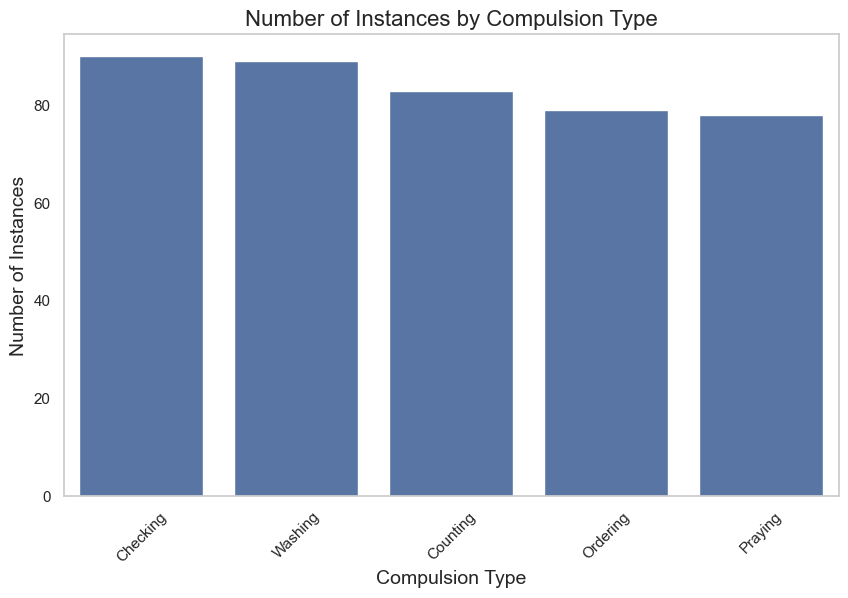

In [72]:
# Count the number of instances for each compulsion type
compulsion_counts = df_filtered_2['Compulsion Type'].value_counts()

# Print the counts
print('Number of Instances for Each Compulsion Type:')
print(compulsion_counts)

# Set up the matplotlib figure
plt.figure(figsize=(10, 6))

# Create a bar plot
sns.barplot(x=compulsion_counts.index, y=compulsion_counts.values)

# Add titles and labels
plt.title('Number of Instances by Compulsion Type', fontsize=16)
plt.xlabel('Compulsion Type', fontsize=14)
plt.ylabel('Number of Instances', fontsize=14)
plt.xticks(rotation=45)
plt.grid(axis='y')

# Show the plot
plt.show()

Average Total Score for each Obsession and Compulsion Type

Average Total Score for Each Obsession Type:
Obsession Type
Contamination    20.000000
Harm-related     20.715909
Hoarding         20.108434
Religious        19.779221
Symmetry         19.451220
Name: Total_Score, dtype: float64


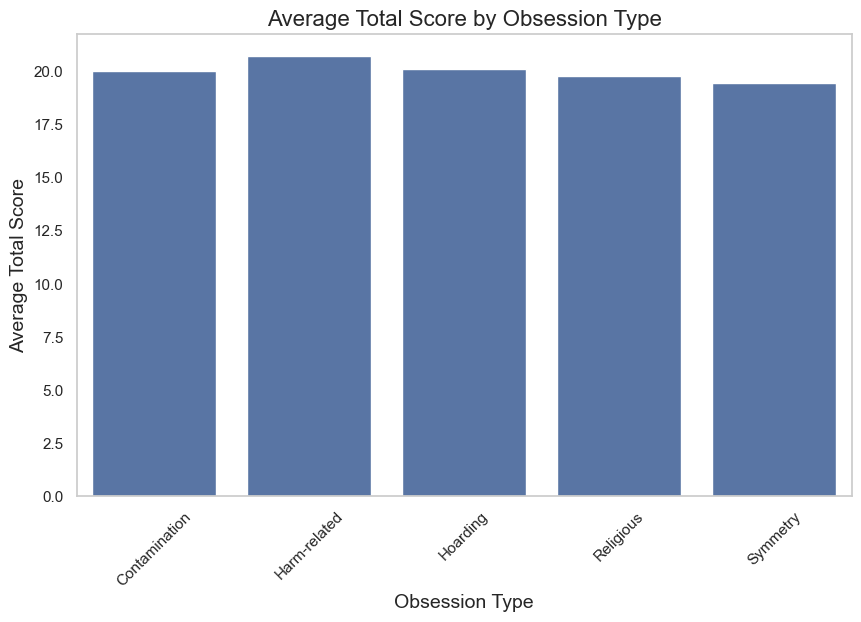

Average Total Score for Each Compulsion Type:
Compulsion Type
Checking    20.522222
Counting    19.614458
Ordering    20.265823
Praying     22.230769
Washing     17.752809
Name: Total_Score, dtype: float64


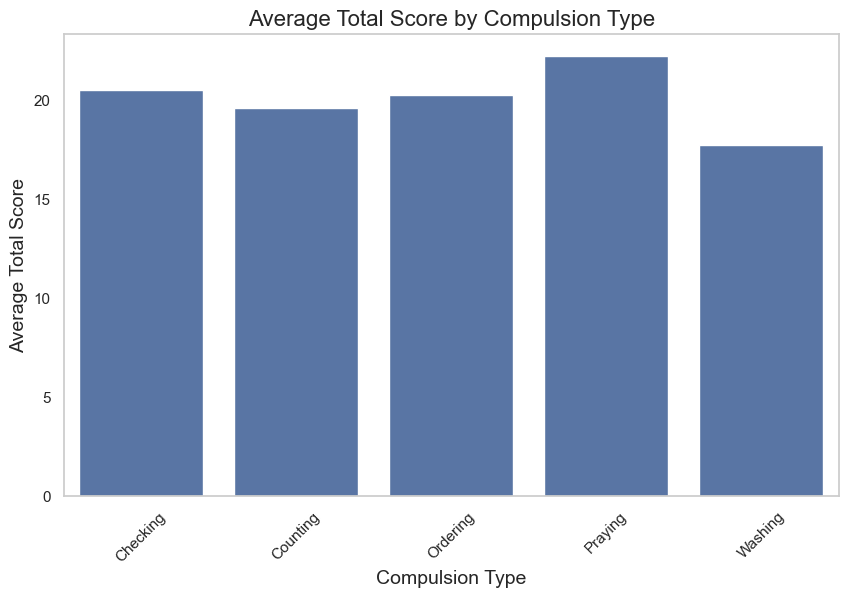

In [73]:
# Calculate average total score for each obsession type
average_scores = df_filtered_2.groupby('Obsession Type')['Total_Score'].mean()

# Print the average scores
print('Average Total Score for Each Obsession Type:')
print(average_scores)

# Set up the matplotlib figure
plt.figure(figsize=(10, 6))

# Create a bar plot
sns.barplot(x=average_scores.index, y=average_scores.values)

# Add titles and labels
plt.title('Average Total Score by Obsession Type', fontsize=16)
plt.xlabel('Obsession Type', fontsize=14)
plt.ylabel('Average Total Score', fontsize=14)
plt.xticks(rotation=45)
plt.grid(axis='y')

# Show the plot
plt.show()


# Calculate average total score for each compulsion type
average_scores = df_filtered_2.groupby('Compulsion Type')['Total_Score'].mean()

# Print the average scores
print('Average Total Score for Each Compulsion Type:')
print(average_scores)

# Set up the matplotlib figure
plt.figure(figsize=(10, 6))

# Create a bar plot
sns.barplot(x=average_scores.index, y=average_scores.values)

# Add titles and labels
plt.title('Average Total Score by Compulsion Type', fontsize=16)
plt.xlabel('Compulsion Type', fontsize=14)
plt.ylabel('Average Total Score', fontsize=14)
plt.xticks(rotation=45)
plt.grid(axis='y')

# Show the plot
plt.show()

Average Y-BOCS Score (Obsessions) for each Obsession Type

Average Y-BOCS Score (Obsessions) for Each Obsession Type:
Obsession Type
Contamination     9.685393
Harm-related     10.795455
Hoarding         10.301205
Religious         9.428571
Symmetry         10.829268
Name: Y-BOCS Score (Obsessions), dtype: float64


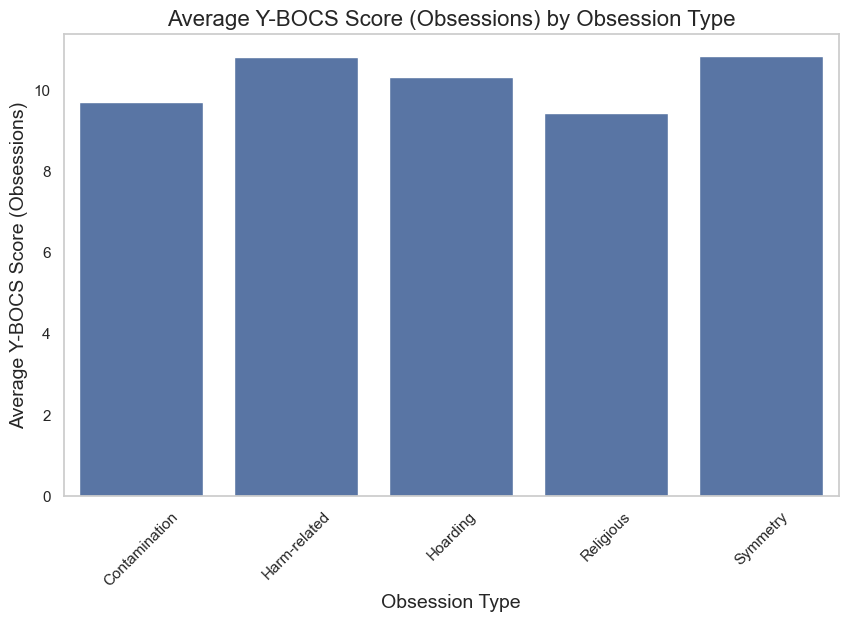

In [74]:
# Calculate average Y-BOCS Score (Obsessions) for each obsession type
average_ybocs_O = df_filtered_2.groupby('Obsession Type')['Y-BOCS Score (Obsessions)'].mean()

# Print the average Y-BOCS scores
print('Average Y-BOCS Score (Obsessions) for Each Obsession Type:')
print(average_ybocs_O)

# Set up the matplotlib figure
plt.figure(figsize=(10, 6))

# Create a bar plot
sns.barplot(x=average_ybocs_O.index, y=average_ybocs_O.values)

# Add titles and labels
plt.title('Average Y-BOCS Score (Obsessions) by Obsession Type', fontsize=16)
plt.xlabel('Obsession Type', fontsize=14)
plt.ylabel('Average Y-BOCS Score (Obsessions)', fontsize=14)
plt.xticks(rotation=45)
plt.grid(axis='y')

# Show the plot
plt.show()

Average Y-BOCS Score (Compulsions) for each Compulsion Type

Average Y-BOCS Score (Compulsions) for Each Compulsion Type:
Compulsion Type
Checking     8.955556
Counting     9.493976
Ordering     9.822785
Praying     11.487179
Washing      9.471910
Name: Y-BOCS Score (Compulsions), dtype: float64


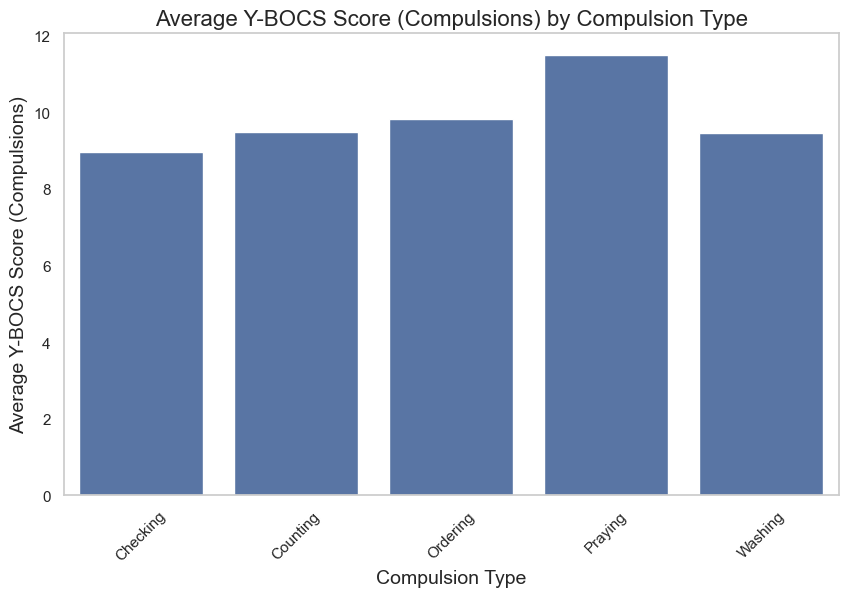

In [75]:
# Calculate average Y-BOCS Score () for each obsession type
average_ybocs_C = df_filtered_2.groupby('Compulsion Type')['Y-BOCS Score (Compulsions)'].mean()

# Print the average Y-BOCS scores
print('Average Y-BOCS Score (Compulsions) for Each Compulsion Type:')
print(average_ybocs_C)

# Set up the matplotlib figure
plt.figure(figsize=(10, 6))

# Create a bar plot
sns.barplot(x=average_ybocs_C.index, y=average_ybocs_C.values)

# Add titles and labels
plt.title('Average Y-BOCS Score (Compulsions) by Compulsion Type', fontsize=16)
plt.xlabel('Compulsion Type', fontsize=14)
plt.ylabel('Average Y-BOCS Score (Compulsions)', fontsize=14)
plt.xticks(rotation=45)
plt.grid(axis='y')

# Show the plot
plt.show()

Input features: Age, Gender, family history of OCD, duration of symptoms, Obsession type, Compulsion Type
Task: Predict if O or C will be dominant

In [76]:
# View a concise dataframe
dataset_new = df_filtered_2[["Age", "Gender", "Family History of OCD", "Duration of Symptoms (months)", "Obsession Type", "Compulsion Type", "Y-BOCS Score (Obsessions)", "Y-BOCS Score (Compulsions)", "Total_Score"]]
dataset_new.head()

,Age,Gender,Family History of OCD,Duration of Symptoms (months),Obsession Type,Compulsion Type,Y-BOCS Score (Obsessions),Y-BOCS Score (Compulsions),Total_Score
0,32,Female,False,203,Harm-related,Checking,17,10,27
2,57,Male,False,173,Contamination,Checking,3,4,7
6,38,Female,False,110,Contamination,Praying,12,16,28
11,73,Female,False,233,Religious,Counting,4,16,20
19,66,Female,False,73,Harm-related,Washing,0,12,12


In [77]:
# Convert boolean values to integers (0 for False, 1 for True)
dataset_new['Family History of OCD'] = dataset_new['Family History of OCD'].astype(int)


C:\Users\shwet\AppData\Local\Temp\ipykernel_8916\179133209.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_new['Family History of OCD'] = dataset_new['Family History of OCD'].astype(int)


In [78]:
# Convert Gender to Boolean: Male as True, Female as False
dataset_new['Gender_Boolean'] = dataset_new['Gender'].map({'Male': True, 'Female': False})

# Convert Boolean to Integers (True -> 1, False -> 0)
dataset_new['Gender_Boolean'] = dataset_new['Gender_Boolean'].astype(int)

C:\Users\shwet\AppData\Local\Temp\ipykernel_8916\4041329191.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_new['Gender_Boolean'] = dataset_new['Gender'].map({'Male': True, 'Female': False})
C:\Users\shwet\AppData\Local\Temp\ipykernel_8916\4041329191.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_new['Gender_Boolean'] = dataset_new['Gender_Boolean'].astype(int)


In [79]:
from sklearn.preprocessing import MinMaxScaler

# Initialize Min-Max Scaler
scaler = MinMaxScaler()

# Select the columns you want to normalize
columns_to_normalize = ['Age', 'Duration of Symptoms (months)']

# Apply the Min-Max scaling
dataset_new[columns_to_normalize] = scaler.fit_transform(dataset_new[columns_to_normalize])

C:\Users\shwet\AppData\Local\Temp\ipykernel_8916\2066631282.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_new[columns_to_normalize] = scaler.fit_transform(dataset_new[columns_to_normalize])


In [80]:
dataset_new.head()

,Age,Gender,Family History of OCD,Duration of Symptoms (months),Obsession Type,Compulsion Type,Y-BOCS Score (Obsessions),Y-BOCS Score (Compulsions),Total_Score,Gender_Boolean
0,0.245614,Female,0,0.841880,Harm-related,Checking,17,10,27,0
2,0.684211,Male,0,0.713675,Contamination,Checking,3,4,7,1
6,0.350877,Female,0,0.444444,Contamination,Praying,12,16,28,0
11,0.964912,Female,0,0.970085,Religious,Counting,4,16,20,0
19,0.842105,Female,0,0.286325,Harm-related,Washing,0,12,12,0


In [81]:
# Count the number of instances where the scores are equal
equal_scores_count = (dataset_new['Y-BOCS Score (Obsessions)'] == dataset_new['Y-BOCS Score (Compulsions)']).sum()

# Print the result
print(f"Number of instances where 'Y-BOCS Score (Obsessions)' is equal to 'Y-BOCS Score (Compulsions)': {equal_scores_count}")

Number of instances where 'Y-BOCS Score (Obsessions)' is equal to 'Y-BOCS Score (Compulsions)': 19


In [82]:
# Count the number of instances where the O scores are more than C
O_scores_count = (dataset_new['Y-BOCS Score (Obsessions)'] > dataset_new['Y-BOCS Score (Compulsions)']).sum()

# Print the result
print(f"Number of instances where 'Y-BOCS Score (Obsessions)' is more than 'Y-BOCS Score (Compulsions)': {O_scores_count}")

Number of instances where 'Y-BOCS Score (Obsessions)' is more than 'Y-BOCS Score (Compulsions)': 200


In [83]:
# Create the 'Obsession_Prediction' column
dataset_new['Obsession_Prediction'] = dataset_new['Y-BOCS Score (Obsessions)'] > dataset_new['Y-BOCS Score (Compulsions)']

# Display the updated dataframe with the new column
dataset_new

C:\Users\shwet\AppData\Local\Temp\ipykernel_8916\171313044.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_new['Obsession_Prediction'] = dataset_new['Y-BOCS Score (Obsessions)'] > dataset_new['Y-BOCS Score (Compulsions)']


,Age,Gender,Family History of OCD,Duration of Symptoms (months),Obsession Type,Compulsion Type,Y-BOCS Score (Obsessions),Y-BOCS Score (Compulsions),Total_Score,Gender_Boolean,Obsession_Prediction
0,0.245614,Female,0,0.841880,Harm-related,Checking,17,10,27,0,True
2,0.684211,Male,0,0.713675,Contamination,Checking,3,4,7,1,False
6,0.350877,Female,0,0.444444,Contamination,Praying,12,16,28,0,False
11,0.964912,Female,0,0.970085,Religious,Counting,4,16,20,0,False
19,0.842105,Female,0,0.286325,Harm-related,Washing,0,12,12,0,False
...,...,...,...,...,...,...,...,...,...,...,...
1484,0.105263,Female,1,0.380342,Contamination,Praying,15,9,24,0,True
1485,0.771930,Female,0,0.666667,Hoarding,Checking,20,15,35,0,True
1493,0.701754,Female,1,0.068376,Contamination,Praying,10,1,11,0,True
1497,0.385965,Male,1,0.401709,Contamination,Counting,2,15,17,1,False


In [84]:
# View a concise dataframe
dataset_final = dataset_new[["Age", "Gender_Boolean", "Family History of OCD", "Duration of Symptoms (months)", "Obsession Type", "Compulsion Type", "Obsession_Prediction"]]
dataset_final

,Age,Gender_Boolean,Family History of OCD,Duration of Symptoms (months),Obsession Type,Compulsion Type,Obsession_Prediction
0,0.245614,0,0,0.841880,Harm-related,Checking,True
2,0.684211,1,0,0.713675,Contamination,Checking,False
6,0.350877,0,0,0.444444,Contamination,Praying,False
11,0.964912,0,0,0.970085,Religious,Counting,False
19,0.842105,0,0,0.286325,Harm-related,Washing,False
...,...,...,...,...,...,...,...
1484,0.105263,0,1,0.380342,Contamination,Praying,True
1485,0.771930,0,0,0.666667,Hoarding,Checking,True
1493,0.701754,0,1,0.068376,Contamination,Praying,True
1497,0.385965,1,1,0.401709,Contamination,Counting,False


In [85]:
dataset_final = pd.DataFrame(dataset_final)
dataset_final

,Age,Gender_Boolean,Family History of OCD,Duration of Symptoms (months),Obsession Type,Compulsion Type,Obsession_Prediction
0,0.245614,0,0,0.841880,Harm-related,Checking,True
2,0.684211,1,0,0.713675,Contamination,Checking,False
6,0.350877,0,0,0.444444,Contamination,Praying,False
11,0.964912,0,0,0.970085,Religious,Counting,False
19,0.842105,0,0,0.286325,Harm-related,Washing,False
...,...,...,...,...,...,...,...
1484,0.105263,0,1,0.380342,Contamination,Praying,True
1485,0.771930,0,0,0.666667,Hoarding,Checking,True
1493,0.701754,0,1,0.068376,Contamination,Praying,True
1497,0.385965,1,1,0.401709,Contamination,Counting,False


In [86]:
from sklearn.preprocessing import OneHotEncoder

# Initialize OneHotEncoder with sparse_output=False to return dense array
encoder = OneHotEncoder(sparse_output=False)

# Apply One-Hot Encoding to the 'Obsession Type' column
one_hot_encoded = encoder.fit_transform(dataset_final[["Obsession Type"]])

# Get the feature names for the encoded columns
encoded_feature_names = encoder.get_feature_names_out(["Obsession Type"])

# Convert the encoded data into a DataFrame
df_one_hot_O = pd.DataFrame(one_hot_encoded, columns=encoded_feature_names)

# Reset the index to avoid row misalignment during concatenation
df_one_hot_O.reset_index(drop=True, inplace=True)

# Concatenate the original dataframe with the new one-hot encoded columns
dataset_final.reset_index(drop=True, inplace=True)  # Reset index in original dataframe too
dataset_final = pd.concat([dataset_final, df_one_hot_O], axis=1)

# Drop the original 'Obsession Type' column if you no longer need it
dataset_final.drop(columns=['Obsession Type'], inplace=True)

# Display the updated dataframe
dataset_final

,Age,Gender_Boolean,Family History of OCD,Duration of Symptoms (months),Compulsion Type,Obsession_Prediction,Obsession Type_Contamination,Obsession Type_Harm-related,Obsession Type_Hoarding,Obsession Type_Religious,Obsession Type_Symmetry
0,0.245614,0,0,0.841880,Checking,True,0.0,1.0,0.0,0.0,0.0
1,0.684211,1,0,0.713675,Checking,False,1.0,0.0,0.0,0.0,0.0
2,0.350877,0,0,0.444444,Praying,False,1.0,0.0,0.0,0.0,0.0
3,0.964912,0,0,0.970085,Counting,False,0.0,0.0,0.0,1.0,0.0
4,0.842105,0,0,0.286325,Washing,False,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
414,0.105263,0,1,0.380342,Praying,True,1.0,0.0,0.0,0.0,0.0
415,0.771930,0,0,0.666667,Checking,True,0.0,0.0,1.0,0.0,0.0
416,0.701754,0,1,0.068376,Praying,True,1.0,0.0,0.0,0.0,0.0
417,0.385965,1,1,0.401709,Counting,False,1.0,0.0,0.0,0.0,0.0


In [87]:
from sklearn.preprocessing import OneHotEncoder

# Initialize OneHotEncoder with sparse_output=False to return dense array
encoder = OneHotEncoder(sparse_output=False)

# Apply One-Hot Encoding to the 'Compulsion Type' column
one_hot_encoded = encoder.fit_transform(dataset_final[["Compulsion Type"]])

# Get the feature names for the encoded columns
encoded_feature_names = encoder.get_feature_names_out(["Compulsion Type"])

# Convert the encoded data into a DataFrame
df_one_hot_C = pd.DataFrame(one_hot_encoded, columns=encoded_feature_names)

# Reset the index to avoid row misalignment during concatenation
df_one_hot_C.reset_index(drop=True, inplace=True)

# Concatenate the original dataframe with the new one-hot encoded columns
dataset_final.reset_index(drop=True, inplace=True)  # Reset index in original dataframe too
dataset_final = pd.concat([dataset_final, df_one_hot_C], axis=1)

# Drop the original 'Obsession Type' column if you no longer need it
dataset_final.drop(columns=['Compulsion Type'], inplace=True)

# Display the updated dataframe
dataset_final

,Age,Gender_Boolean,Family History of OCD,Duration of Symptoms (months),Obsession_Prediction,Obsession Type_Contamination,Obsession Type_Harm-related,Obsession Type_Hoarding,Obsession Type_Religious,Obsession Type_Symmetry,Compulsion Type_Checking,Compulsion Type_Counting,Compulsion Type_Ordering,Compulsion Type_Praying,Compulsion Type_Washing
0,0.245614,0,0,0.841880,True,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,0.684211,1,0,0.713675,False,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,0.350877,0,0,0.444444,False,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.964912,0,0,0.970085,False,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
4,0.842105,0,0,0.286325,False,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
414,0.105263,0,1,0.380342,True,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
415,0.771930,0,0,0.666667,True,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
416,0.701754,0,1,0.068376,True,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
417,0.385965,1,1,0.401709,False,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [88]:
from sklearn.model_selection import train_test_split

# Separate features (x) and target variable (y)
target_column = 'Obsession_Prediction'

# Features
X = dataset_final.drop(columns=[target_column])

# Target
y = dataset_final[target_column]

# Split the data into training and testing sets
# test_size=0.2 means 20% of the data will be used for testing
# random_state ensures reproducibility
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print the shapes of the resulting datasets
print(f"Training features shape: {X_train.shape}")
print(f"Testing features shape: {X_test.shape}")
print(f"Training target shape: {y_train.shape}")
print(f"Testing target shape: {y_test.shape}")

Training features shape: (335, 14)
Testing features shape: (84, 14)
Training target shape: (335,)
Testing target shape: (84,)


In [89]:
from sklearn.ensemble import RandomForestClassifier

models = {
    "RF_1": RandomForestClassifier(n_estimators=10, max_depth=3),
    "RF_2": RandomForestClassifier(n_estimators=100, max_depth=5)
}

# Iterate over the dictionary as follows:
for name, classifier in models.items():
    print("The name of the classifier is:", name, " and it is a sklearn object:", classifier)

The name of the classifier is: RF_1  and it is a sklearn object: RandomForestClassifier(max_depth=3, n_estimators=10)
The name of the classifier is: RF_2  and it is a sklearn object: RandomForestClassifier(max_depth=5)


In [90]:
# Individual performance metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import time

In [91]:
# Pandas dataframe to store results of each variable on the classifiers
results = pd.DataFrame({
                        "classifier_name": [],
                        "training_time": [],
                        "prediction_time": [],
                        "accuracy": [],
                        "precision": [],
                        "recall": [],
                        "f1": []
                        })
results

,classifier_name,training_time,prediction_time,accuracy,precision,recall,f1


In [92]:
# Apply the classifier in each dataset
for name, classifier in models.items():

    # Start measuring the training time
    t_start = time.time()
    # The code below applies the specific classifier from the loop on the data
    classifier.fit(X_train,y_train)
    # Stop measuring training time
    t_end = time.time()
    # Calculate Variable of interest `training_time`
    training_time = t_end - t_start
    #######

    # Start measuring the prediction time
    t_start = time.time()
    # Predict on test set
    y_predicted = classifier.predict(X_test)
    # Stop measuring prediction time
    t_end = time.time()
    # Calculate Variable of interest `prediction_time`
    prediction_time = t_end - t_start
    #######


    # Get performance metrics
    accuracy_result = accuracy_score(y_test, y_predicted)
    precision_result = precision_score(y_test, y_predicted)
    recall_result = recall_score(y_test, y_predicted)
    f1_result = f1_score(y_test, y_predicted)
    #######


    #### Generate the results to populate the pandas.DataFrame
    this_result = pd.DataFrame({
                    "classifier_name": [name],
                    "training_time": [training_time],
                    "prediction_time": [prediction_time],
                    "accuracy": [accuracy_result],
                    "precision": [precision_result],
                    "recall": [recall_result],
                    "f1": [f1_result]
                    })
    # Append to the main dataframe with the results
    results = pd.concat([results, this_result], axis=0, ignore_index=True)

results

,classifier_name,training_time,prediction_time,accuracy,precision,recall,f1
0,RF_1,0.029223,0.003764,0.523810,0.500000,0.45,0.473684
1,RF_2,0.164837,0.003020,0.511905,0.484848,0.40,0.438356


In [93]:
# View a concise dataframe for Regression
dataset_final_R = dataset_new[["Age", "Gender_Boolean", "Family History of OCD", "Duration of Symptoms (months)", "Obsession Type", "Compulsion Type", "Total_Score"]]
dataset_final_R

,Age,Gender_Boolean,Family History of OCD,Duration of Symptoms (months),Obsession Type,Compulsion Type,Total_Score
0,0.245614,0,0,0.841880,Harm-related,Checking,27
2,0.684211,1,0,0.713675,Contamination,Checking,7
6,0.350877,0,0,0.444444,Contamination,Praying,28
11,0.964912,0,0,0.970085,Religious,Counting,20
19,0.842105,0,0,0.286325,Harm-related,Washing,12
...,...,...,...,...,...,...,...
1484,0.105263,0,1,0.380342,Contamination,Praying,24
1485,0.771930,0,0,0.666667,Hoarding,Checking,35
1493,0.701754,0,1,0.068376,Contamination,Praying,11
1497,0.385965,1,1,0.401709,Contamination,Counting,17


In [94]:
from sklearn.preprocessing import OneHotEncoder

# Initialize OneHotEncoder with sparse_output=False to return dense array
encoder = OneHotEncoder(sparse_output=False)

# Apply One-Hot Encoding to the 'Obsession Type' column
one_hot_encoded = encoder.fit_transform(dataset_final_R[["Obsession Type"]])

# Get the feature names for the encoded columns
encoded_feature_names = encoder.get_feature_names_out(["Obsession Type"])

# Convert the encoded data into a DataFrame
df_one_hot_O = pd.DataFrame(one_hot_encoded, columns=encoded_feature_names)

# Reset the index to avoid row misalignment during concatenation
df_one_hot_O.reset_index(drop=True, inplace=True)

# Concatenate the original dataframe with the new one-hot encoded columns
dataset_final_R.reset_index(drop=True, inplace=True)  # Reset index in original dataframe too
dataset_final_R = pd.concat([dataset_final_R, df_one_hot_O], axis=1)

# Drop the original 'Obsession Type' column if you no longer need it
dataset_final_R.drop(columns=['Obsession Type'], inplace=True)

# Display the updated dataframe
dataset_final_R

,Age,Gender_Boolean,Family History of OCD,Duration of Symptoms (months),Compulsion Type,Total_Score,Obsession Type_Contamination,Obsession Type_Harm-related,Obsession Type_Hoarding,Obsession Type_Religious,Obsession Type_Symmetry
0,0.245614,0,0,0.841880,Checking,27,0.0,1.0,0.0,0.0,0.0
1,0.684211,1,0,0.713675,Checking,7,1.0,0.0,0.0,0.0,0.0
2,0.350877,0,0,0.444444,Praying,28,1.0,0.0,0.0,0.0,0.0
3,0.964912,0,0,0.970085,Counting,20,0.0,0.0,0.0,1.0,0.0
4,0.842105,0,0,0.286325,Washing,12,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
414,0.105263,0,1,0.380342,Praying,24,1.0,0.0,0.0,0.0,0.0
415,0.771930,0,0,0.666667,Checking,35,0.0,0.0,1.0,0.0,0.0
416,0.701754,0,1,0.068376,Praying,11,1.0,0.0,0.0,0.0,0.0
417,0.385965,1,1,0.401709,Counting,17,1.0,0.0,0.0,0.0,0.0


In [95]:
from sklearn.preprocessing import OneHotEncoder

# Initialize OneHotEncoder with sparse_output=False to return dense array
encoder = OneHotEncoder(sparse_output=False)

# Apply One-Hot Encoding to the 'Compulsion Type' column
one_hot_encoded = encoder.fit_transform(dataset_final_R[["Compulsion Type"]])

# Get the feature names for the encoded columns
encoded_feature_names = encoder.get_feature_names_out(["Compulsion Type"])

# Convert the encoded data into a DataFrame
df_one_hot_C = pd.DataFrame(one_hot_encoded, columns=encoded_feature_names)

# Reset the index to avoid row misalignment during concatenation
df_one_hot_C.reset_index(drop=True, inplace=True)

# Concatenate the original dataframe with the new one-hot encoded columns
dataset_final_R.reset_index(drop=True, inplace=True)  # Reset index in original dataframe too
dataset_final_R = pd.concat([dataset_final_R, df_one_hot_C], axis=1)

# Drop the original 'Obsession Type' column if you no longer need it
dataset_final_R.drop(columns=['Compulsion Type'], inplace=True)

# Select the columns you want to normalize
columns_to_normalize = ['Total_Score']

# Apply the Min-Max scaling
dataset_final_R[columns_to_normalize] = scaler.fit_transform(dataset_final_R[columns_to_normalize])

# Display the updated dataframe
dataset_final_R

,Age,Gender_Boolean,Family History of OCD,Duration of Symptoms (months),Total_Score,Obsession Type_Contamination,Obsession Type_Harm-related,Obsession Type_Hoarding,Obsession Type_Religious,Obsession Type_Symmetry,Compulsion Type_Checking,Compulsion Type_Counting,Compulsion Type_Ordering,Compulsion Type_Praying,Compulsion Type_Washing
0,0.245614,0,0,0.841880,0.666667,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,0.684211,1,0,0.713675,0.153846,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,0.350877,0,0,0.444444,0.692308,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.964912,0,0,0.970085,0.487179,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
4,0.842105,0,0,0.286325,0.282051,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
414,0.105263,0,1,0.380342,0.589744,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
415,0.771930,0,0,0.666667,0.871795,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
416,0.701754,0,1,0.068376,0.256410,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
417,0.385965,1,1,0.401709,0.410256,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [96]:
from sklearn.model_selection import train_test_split

# Separate features (x) and target variable (y)
target_column = 'Total_Score'

# Features
X = dataset_final_R.drop(columns=[target_column])

# Target
y = dataset_final_R[target_column]

# Split the data into training and testing sets
# test_size=0.2 means 20% of the data will be used for testing
# random_state ensures reproducibility
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print the shapes of the resulting datasets
print(f"Training features shape: {X_train.shape}")
print(f"Testing features shape: {X_test.shape}")
print(f"Training target shape: {y_train.shape}")
print(f"Testing target shape: {y_test.shape}")

Training features shape: (335, 14)
Testing features shape: (84, 14)
Training target shape: (335,)
Testing target shape: (84,)


In [97]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)

rf_regressor.fit(X_train, y_train)

# Make predictions on the test data
y_pred = rf_regressor.predict(X_test)

#Evaluate the model
# Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

# R-squared (R2) Score
r2 = r2_score(y_test, y_pred)
print(f"R2 Score: {r2}")

# Optional: Display predictions and actual values for comparison
comparison_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(comparison_df.head())

Mean Squared Error: 0.0704099315926239
R2 Score: -0.13321872652098987
       Actual  Predicted
203  0.128205   0.543846
278  0.358974   0.556923
172  0.948718   0.507949
368  0.487179   0.452564
352  0.256410   0.453846
